# PROBLEM STATEMENT

# MODEL  TO CLASSIFY TRAFFIC SIGNS USING DEEP LEARNING

In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them.

The dataset contains 43 different classes of images.

Classes are as listed below:

( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
(10, b'No passing for vehicles over 3.5 metric tons')
(11, b'Right-of-way at the next intersection') (12, b'Priority road')
(13, b'Yield') (14, b'Stop') (15, b'No vehicles')
(16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
(18, b'General caution') (19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right') (21, b'Double curve')
(22, b'Bumpy road') (23, b'Slippery road')
(24, b'Road narrows on the right') (25, b'Road work')
(26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
(29, b'Bicycles crossing') (30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits') (33, b'Turn right ahead')
(34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
(37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
(40, b'Roundabout mandatory') (41, b'End of no passing')
(42, b'End of no passing by vehicles over 3.5 metric tons')

In [ ]:
#import Liberarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import random

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
#Loading the datasets

with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train= pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid= pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test= pickle.load(testing_data)

In [3]:
#Splitting it 

x_train, y_train= train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test= test['features'], test['labels']


In [4]:
x_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

# Data Exploration

1

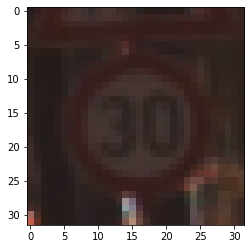

In [6]:
i=2500
plt.imshow(x_train[i]) #Show image at i position
y_train[i]    # Show me the label of an image 

# Data preprocessing

In [7]:
!pip install -U scikit-learn

In [8]:
## Shuffle the dataset

from sklearn.utils import shuffle
x_train, y_train= shuffle(x_train, y_train)

In [9]:
#Converting images into gray scale(preserving max feature of an image)
x_train_gray= np.sum(x_train/3, axis=3, keepdims= True)
x_test_gray= np.sum(x_test/3, axis=3, keepdims= True)
x_validation_gray= np.sum(x_validation/3, axis=3, keepdims= True)

In [10]:
x_test_gray.shape

(12630, 32, 32, 1)

In [11]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [12]:
x_train_gray.shape

(34799, 32, 32, 1)

In [13]:
#Converting images into gray scale(pixel -1to 1)
x_train_gray_norm = (x_train_gray-128)/128
x_test_gray_norm = (x_test_gray-128)/128
x_validation_gray_norm = (x_validation_gray-128)/128

In [14]:
x_train_gray_norm.shape

(34799, 32, 32, 1)

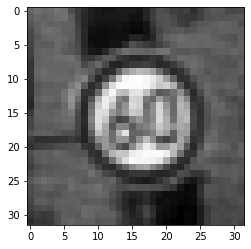

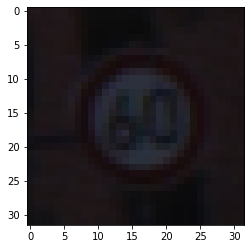

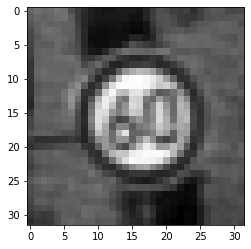

In [15]:
#Visulazing the images 

i=500
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

In [16]:
#!pip install keras

In [17]:
#!pip install tensorflow

In [25]:
pip install --ignore-installed --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Ram' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
#importing liberaries 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [30]:
from tensorflow.keras.optimizers import Adam

In [32]:
image_shape = x_train_gray[i].shape

In [34]:
#Designing the model

cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [35]:
#complie the model 
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\Ram Shankar\anaconda3\envs\MLproject\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [38]:
#model fit 

history = cnn_model.fit(x_train_gray_norm,
                        y_train,
                        batch_size=1000,
                        epochs=50,
                        verbose=1,
                        validation_data = (x_validation_gray_norm,y_validation))

Epoch 1/50
35/35 [==============================] - 14s 364ms/step - loss: 3.4603 - accuracy: 0.1118 - val_loss: 3.3544 - val_accuracy: 0.1846
Epoch 2/50
35/35 [==============================] - 13s 382ms/step - loss: 2.6797 - accuracy: 0.3197 - val_loss: 2.3866 - val_accuracy: 0.3698
Epoch 3/50
35/35 [==============================] - 16s 453ms/step - loss: 1.6886 - accuracy: 0.5346 - val_loss: 1.6221 - val_accuracy: 0.5646
Epoch 4/50
35/35 [==============================] - 15s 438ms/step - loss: 1.1477 - accuracy: 0.6866 - val_loss: 1.2760 - val_accuracy: 0.6290
Epoch 5/50
35/35 [==============================] - 14s 410ms/step - loss: 0.8907 - accuracy: 0.7548 - val_loss: 1.1034 - val_accuracy: 0.6805
Epoch 6/50
35/35 [==============================] - 15s 435ms/step - loss: 0.7298 - accuracy: 0.8011 - val_loss: 0.9460 - val_accuracy: 0.7261
Epoch 7/50
35/35 [==============================] - 13s 363ms/step - loss: 0.6339 - accuracy: 0.8252 - val_loss: 0.9062 - val_accuracy: 0.7193

# Model Evaluation

In [41]:
score = cnn_model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy : {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 1.1726 - accuracy: 0.8498
Test Accuracy : 0.8498020768165588


In [42]:
#checking keys

history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
accuracy= history.history['accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']
val_accuracy= history.history['val_accuracy']

epochs=  range(len(accuracy))

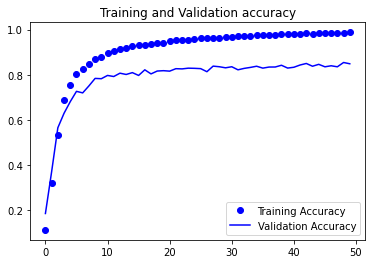

In [48]:
#Plotting Accuracy 


plt.plot(epochs, accuracy, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


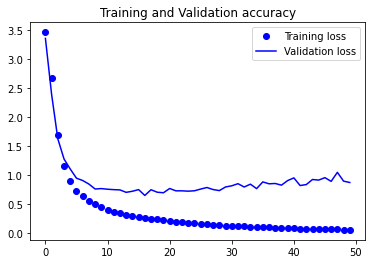

In [49]:
#Plotting Loss 


plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and Validation accuracy')
plt.legend()

In [54]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(x_test_gray_norm)
classes_x=np.argmax(predicted_classes,axis=1)
#get the indices to be plotted
y_true= y_test

<AxesSubplot:>

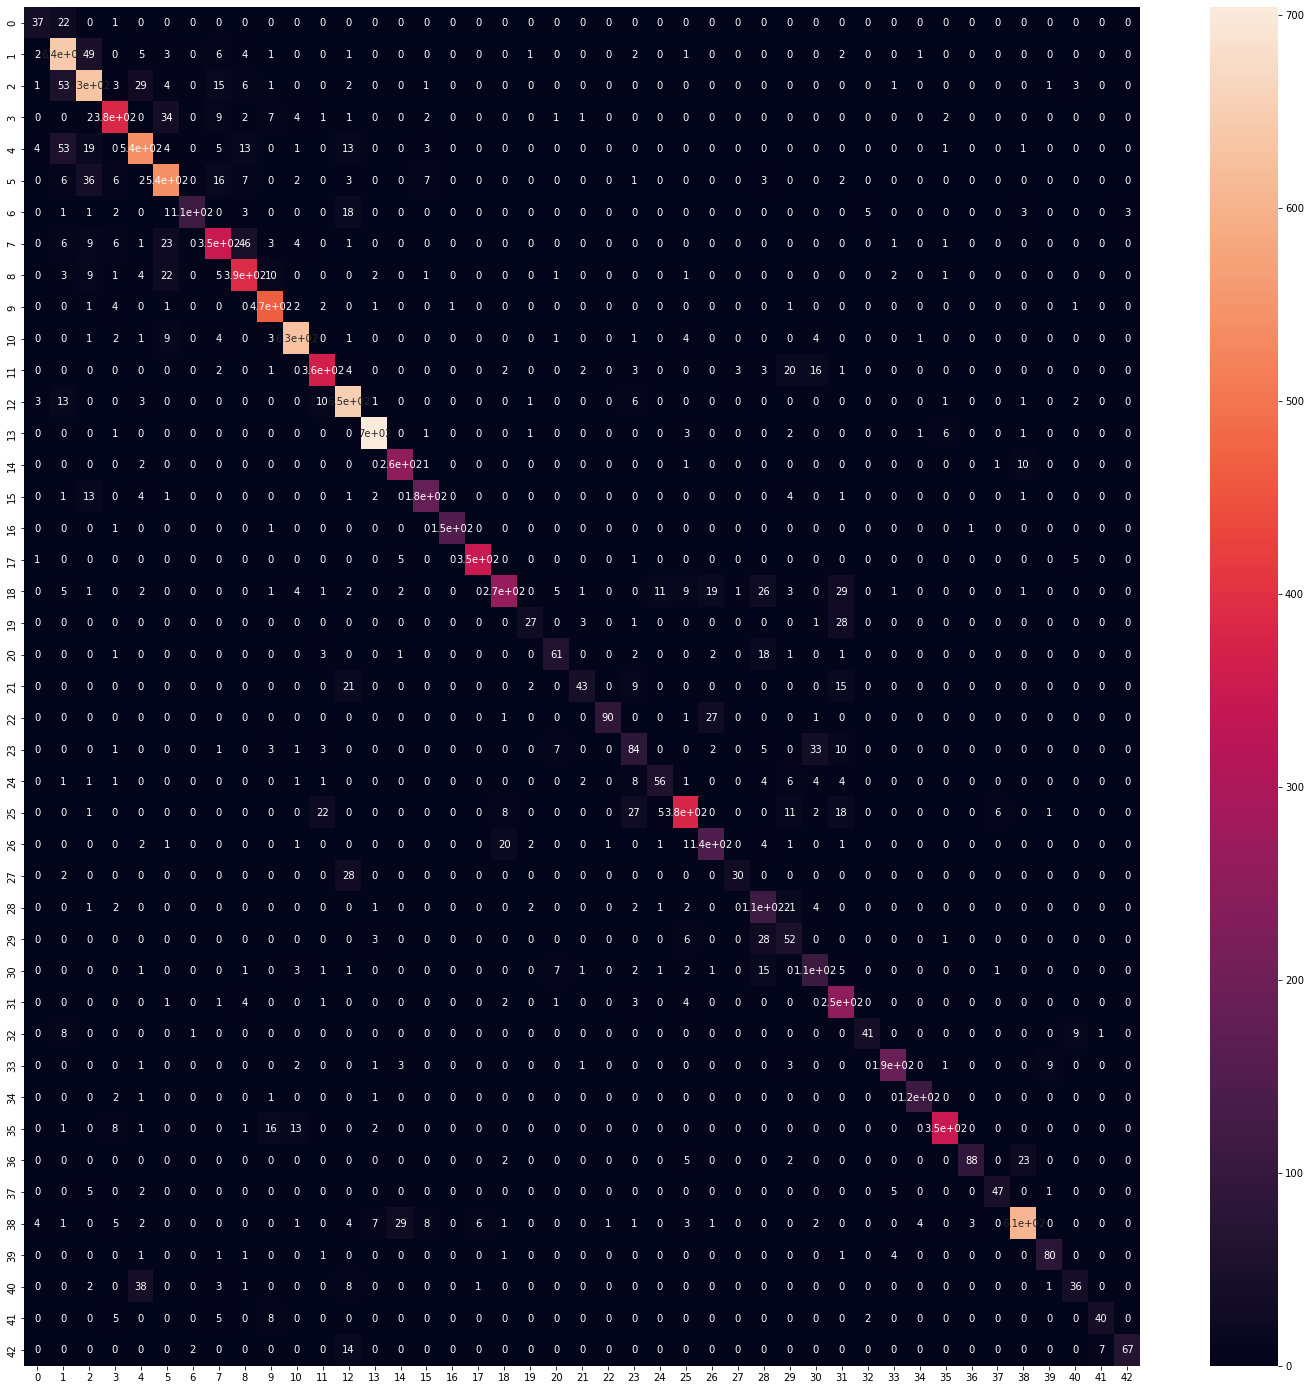

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, classes_x)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

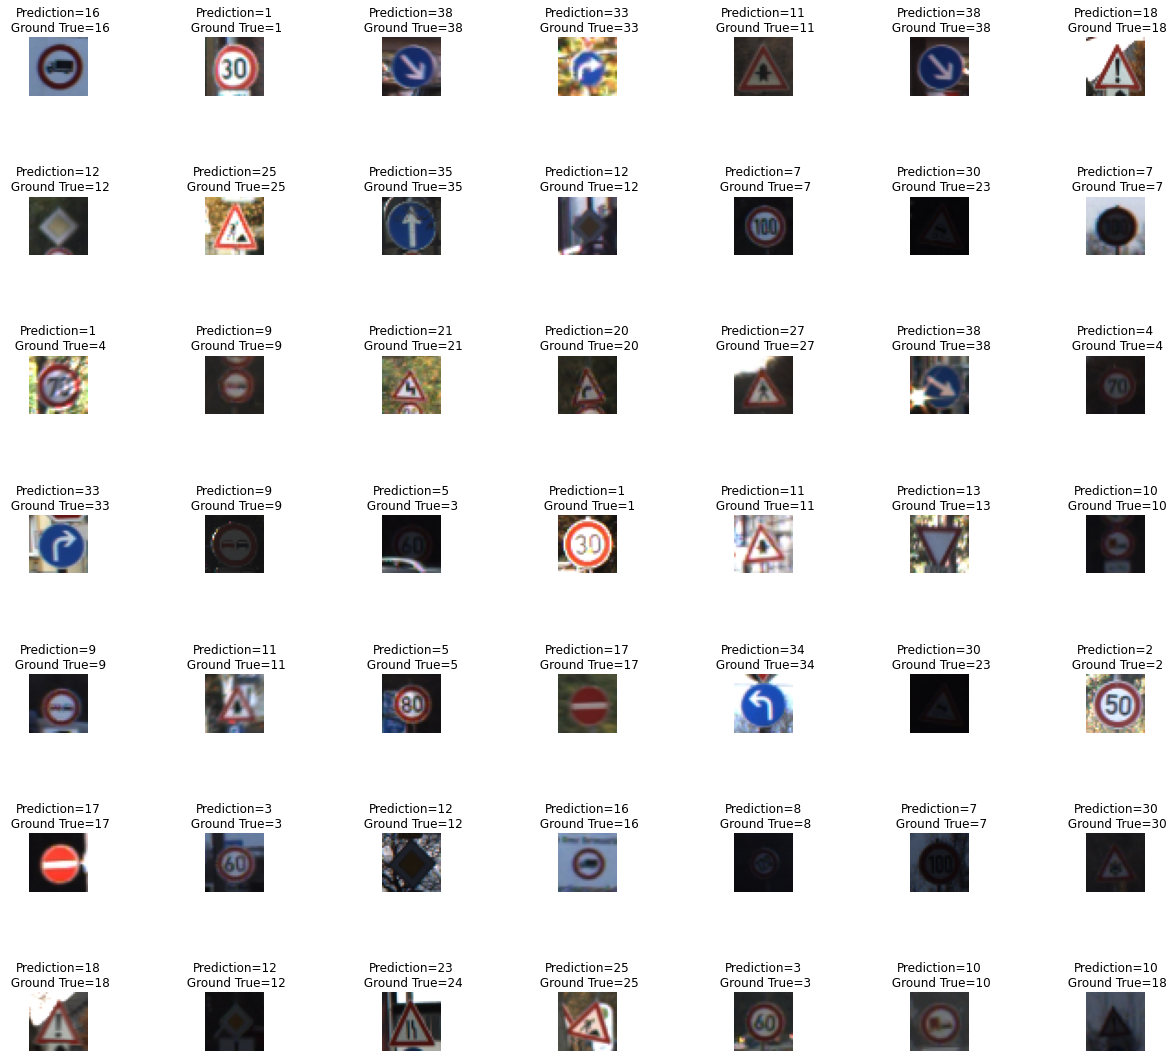

In [63]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    #showing prediction and ground truth
    axes[i].set_title("Prediction={}\n Ground True={}".format(classes_x[i], y_true[i]))
    #Taking off axes
    axes[i].axis('off')

#Inceasing the space b/w images 
plt.subplots_adjust(wspace=2)